In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


## Downloading Data

In [4]:
import os

In [5]:
data_customer = pd.read_csv('/content/gdrive/MyDrive/rakamin/Case Study - Customer.csv',sep=';')
data_product = pd.read_csv('/content/gdrive/MyDrive/rakamin/Case Study - Product.csv',sep=';')
data_store = pd.read_csv('/content/gdrive/MyDrive/rakamin/Case Study - Store.csv',sep=';')
data_transaction = pd.read_csv('/content/gdrive/MyDrive/rakamin/Case Study - Transaction.csv',sep=';')
# for file in os.listdir(data):
#   print(file)

In [6]:
data_customer.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"


## Planning - Exploring General Information of Data

In [7]:
data_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB


In [8]:
data_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StoreID     14 non-null     int64 
 1   StoreName   14 non-null     object
 2   GroupStore  14 non-null     object
 3   Type        14 non-null     object
 4   Latitude    14 non-null     object
 5   Longitude   14 non-null     object
dtypes: int64(1), object(5)
memory usage: 800.0+ bytes


In [9]:
data_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     10 non-null     object
 1   Product Name  10 non-null     object
 2   Price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


In [10]:
data_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  444 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB


## Data Cleansing

Perhatikan bahwa data customer memiliki nilai kosong. Dengan begitu, kita dapat isi dengan status marital terbanyak sesuai dengan usianya, yaitu dnegan menggunakan modus

In [11]:
data_customer.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"


In [12]:
data_customer['Marital Status'].loc[data_customer['Marital Status'].isna()==True] = [data_customer['Marital Status'].loc[data_customer.Age==i].mode()[0] for i in data_customer['Age'].loc[data_customer['Marital Status'].isna()==True]]

<ipython-input-12-526e56a1c6d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_customer['Marital Status'].loc[data_customer['Marital Status'].isna()==True] = [data_customer['Marital Status'].loc[data_customer.Age==i].mode()[0] for i in data_customer['Age'].loc[data_customer['Marital Status'].isna()==True]]


In [13]:
data_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  447 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB


## EDA

In [14]:
data_transaction.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4


###### Drop kolom transactionID.

In [15]:
data_transaction = data_transaction.drop('TransactionID',axis=1)

###### Cek kolom CustomerID, lakukan merge untuk menyatukan informasi pembeli dengan produk yang dibeli.

In [16]:
data_transaction['CustomerID'].max()

447

In [17]:
data_customer['CustomerID'].max()

447

In [18]:
data_merge = pd.merge(data_transaction,data_customer,on='CustomerID',how='left')

###### Cek kolom price.

In [19]:
data_merge.head()

,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income
0,328,01/01/2022,P3,7500,4,30000,12,36,0,Married,"10,53"
1,165,01/01/2022,P9,10000,7,70000,1,44,1,Married,"14,58"
2,183,01/01/2022,P1,8800,4,35200,4,27,1,Single,"0,18"
3,160,01/01/2022,P1,8800,7,61600,4,48,1,Married,"12,57"
4,386,01/01/2022,P9,10000,1,10000,4,33,0,Married,"6,95"


In [20]:
data_merge.Price.unique()

array([ 7500, 10000,  8800, 15000, 16000,  4200,  9400, 12000,  3200,
       18000])

In [21]:
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      5020 non-null   int64 
 1   Date            5020 non-null   object
 2   ProductID       5020 non-null   object
 3   Price           5020 non-null   int64 
 4   Qty             5020 non-null   int64 
 5   TotalAmount     5020 non-null   int64 
 6   StoreID         5020 non-null   int64 
 7   Age             5020 non-null   int64 
 8   Gender          5020 non-null   int64 
 9   Marital Status  5020 non-null   object
 10  Income          5020 non-null   object
dtypes: int64(7), object(4)
memory usage: 470.6+ KB


Terlihat bahwa price sudah sesuai dengan unique element pada data Product, sehingga tidak perlu perubahan.

###### Cek kolom marital status, ubah menjadi label encoding 0 dan 1.

In [22]:
data_merge['Marital Status'] = [1 if i=='Married' else 0 for i in data_merge['Marital Status']]

In [23]:
data_merge.head()

,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income
0,328,01/01/2022,P3,7500,4,30000,12,36,0,1,"10,53"
1,165,01/01/2022,P9,10000,7,70000,1,44,1,1,"14,58"
2,183,01/01/2022,P1,8800,4,35200,4,27,1,0,"0,18"
3,160,01/01/2022,P1,8800,7,61600,4,48,1,1,"12,57"
4,386,01/01/2022,P9,10000,1,10000,4,33,0,1,"6,95"


###### Ubah tipe data Income dari string menjadi float

In [75]:
data_merge.Income = ['.'.join(data_merge.Income[i].split(',')) for i in range(data_merge.shape[0])]

AttributeError: ignored

In [25]:
data_merge.Income = data_merge.Income.astype('float')

In [64]:
data_merge.head()

,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income
0,328,01/01/2022,P3,7500,4,30000,12,36,0,1,10.53
1,165,01/01/2022,P9,10000,7,70000,1,44,1,1,14.58
2,183,01/01/2022,P1,8800,4,35200,4,27,1,0,0.18
3,160,01/01/2022,P1,8800,7,61600,4,48,1,1,12.57
4,386,01/01/2022,P9,10000,1,10000,4,33,0,1,6.95


###### Eksplor

Heatmap korelasi antarvariabel

<Axes: >

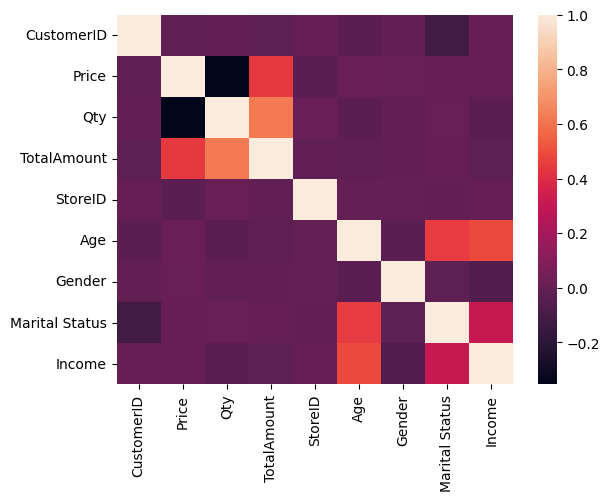

In [26]:
sns.heatmap(data_merge.drop(['Date','ProductID'],axis=1).corr())

## Customer Segment Clustering

In [29]:
data_merge

,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income
0,328,01/01/2022,P3,7500,4,30000,12,36,0,1,10.53
1,165,01/01/2022,P9,10000,7,70000,1,44,1,1,14.58
2,183,01/01/2022,P1,8800,4,35200,4,27,1,0,0.18
3,160,01/01/2022,P1,8800,7,61600,4,48,1,1,12.57
4,386,01/01/2022,P9,10000,1,10000,4,33,0,1,6.95
...,...,...,...,...,...,...,...,...,...,...,...
5015,243,31/12/2022,P10,15000,5,75000,3,38,0,1,3.34
5016,271,31/12/2022,P2,3200,4,12800,9,29,0,1,4.74
5017,52,31/12/2022,P7,9400,6,56400,9,37,0,1,3.73
5018,18,31/12/2022,P8,16000,3,48000,13,47,0,1,13.60


In [70]:
data_merge

,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income
0,328,01/01/2022,P3,7500,4,30000,12,36,0,1,10.53
1,165,01/01/2022,P9,10000,7,70000,1,44,1,1,14.58
2,183,01/01/2022,P1,8800,4,35200,4,27,1,0,0.18
3,160,01/01/2022,P1,8800,7,61600,4,48,1,1,12.57
4,386,01/01/2022,P9,10000,1,10000,4,33,0,1,6.95
...,...,...,...,...,...,...,...,...,...,...,...
5015,243,31/12/2022,P10,15000,5,75000,3,38,0,1,3.34
5016,271,31/12/2022,P2,3200,4,12800,9,29,0,1,4.74
5017,52,31/12/2022,P7,9400,6,56400,9,37,0,1,3.73
5018,18,31/12/2022,P8,16000,3,48000,13,47,0,1,13.60


In [65]:
new_data=pd.concat([data_merge.groupby('CustomerID')[['TotalAmount',
            'Qty']].sum().reset_index().drop('CustomerID',axis=1),
           data_merge.groupby('CustomerID')['Qty'].count().reset_index().drop('CustomerID',
            axis=1)],axis=1)

new_data.columns = ['TotalAmount','Qty','TransactionCount']

In [71]:
data_merged_cluster=pd.concat([new_data,data_customer],axis=1)

In [72]:
data_merged_cluster['Marital Status'].unique()

array(['Married', 'Single'], dtype=object)

In [73]:
data_merged_cluster['Marital Status'] = [0 if i=='Single' else 1 for i in data_merged_cluster['Marital Status']]

In [74]:
data_merged_cluster

,TotalAmount,Qty,TransactionCount,CustomerID,Age,Gender,Marital Status,Income
0,623300,60,17,1,55,1,1,"5,12"
1,392300,57,13,2,60,1,1,"6,23"
2,446200,56,15,3,32,1,1,"9,17"
3,302500,46,10,4,31,1,1,"4,87"
4,268600,27,7,5,58,1,1,"3,57"
...,...,...,...,...,...,...,...,...
442,485100,59,16,443,33,1,1,"9,28"
443,577700,62,18,444,53,0,1,"15,31"
444,587200,68,18,445,51,0,1,"14,48"
445,423300,42,11,446,57,0,1,"7,81"


In [62]:
data_merged_cluster=data_merged_cluster.drop('CustomerID',axis=1)

In [76]:
data_merged_cluster.Income = ['.'.join(data_merged_cluster.Income[i].split(',')) for i in range(data_merged_cluster.shape[0])]

In [77]:
data_merged_cluster.Income = data_merged_cluster.Income.astype('float')

In [78]:
data_merged_cluster.head()

,TotalAmount,Qty,TransactionCount,CustomerID,Age,Gender,Marital Status,Income
0,623300,60,17,1,55,1,1,5.12
1,392300,57,13,2,60,1,1,6.23
2,446200,56,15,3,32,1,1,9.17
3,302500,46,10,4,31,1,1,4.87
4,268600,27,7,5,58,1,1,3.57


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['TotalAmount'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['Qty'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['TransactionCount'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_3, *['CustomerID'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_4, *['TotalAmount'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_5, *['Qty'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_6, *['TransactionCount'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_7, *['CustomerID'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_8, *[[['TotalAmount', 'Qty'], ['Qty', 'TransactionCount'], ['TransactionCount', 'CustomerID'], ['CustomerID', 'Age']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_9, *['CustomerID', 'TotalAmount', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_10, *['CustomerID', 'Qty', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_11, *['CustomerID', 'TransactionCount', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_12, *['CustomerID', 'Age', None], **{})
chart

<Axes: >

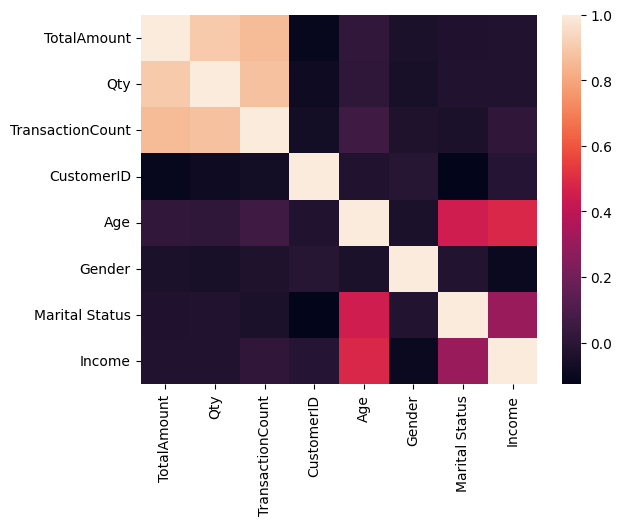

In [79]:
sns.heatmap(data_merged_cluster.corr())

###### Dimensionality Reduction

In [81]:
data_merged_cluster=data_merged_cluster.drop('CustomerID',axis=1)

In [102]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [95]:
standard = StandardScaler()
scaled_data_cluster=standard.fit_transform(data_merged_cluster)

In [105]:
pcaed=PCA(n_components=2, random_state=42)
pcaed_cluster=pcaed.fit_transform(scaled_data_cluster)

In [106]:
kmeans = KMeans(init="random",n_clusters=3,n_init=10,max_iter=300,random_state=42)

In [146]:
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit_transform(scaled_data_cluster)
  score = silhouette_score(scaled_data_cluster, kmeans.labels_)
  silhouette_coefficients.append(score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [149]:
silhouette_coefficients

[0.2293583741286594,
 0.24913491887323572,
 0.23851310537906786,
 0.2450852256253135,
 0.25208776063706967,
 0.23890114558408,
 0.23021226946786064,
 0.2301025351581029,
 0.25262647544331296]

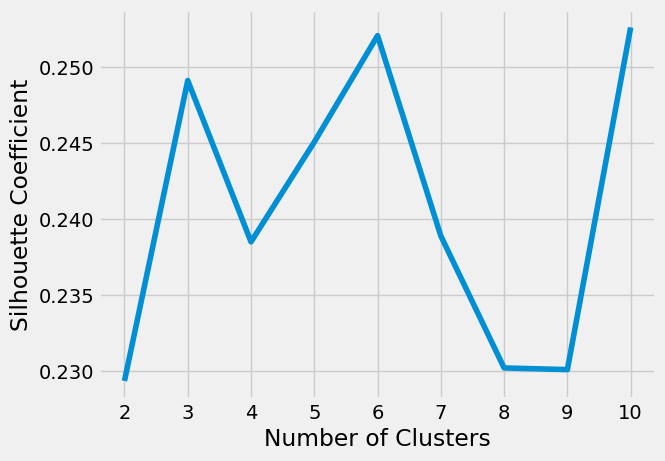

In [148]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [150]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(pcaed_cluster)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

In [151]:
x=list(pd.DataFrame(pcaed_cluster)[0].values)
y=list(pd.DataFrame(pcaed_cluster)[1].values)

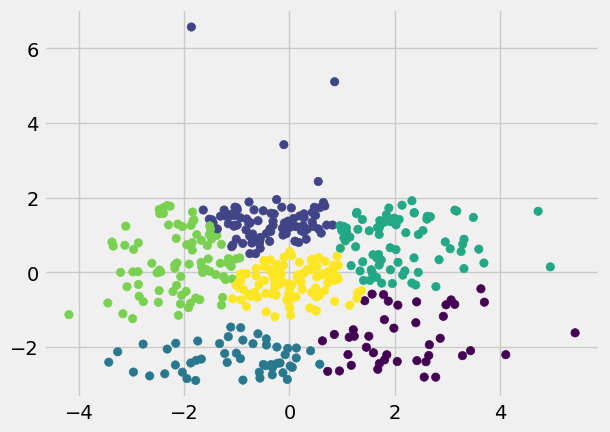

In [152]:
plt.scatter(x,y,c=kmeans.labels_)